In [ ]:
# https://towardsdatascience.com/measuring-the-intrinsic-causal-influence-of-your-marketing-campaigns-aa8354c26b7b

In [ ]:
!pip install dowhy


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import gcm

In [ ]:
# Create node lookup for channels
node_lookup = {0: 'A',
               1: 'B',
               2: 'C',
               3: 'D = A + B + C + noise',
               4: 'E = A + B + C + noise',
               5: 'F = D + E + noise'
 }

total_nodes = len(node_lookup)

In [ ]:
# Create adjacency matrix - this is the base for our graph
graph_actual = np.zeros((total_nodes, total_nodes))

# Create graph using expert domain knowledge
graph_actual[0, 3] = 1.0 # Demand -> Organic clicks
graph_actual[0, 4] = 1.0 # Demand -> Social clicks
graph_actual[1, 3] = 1.0 # Brand spend -> Organic clicks
graph_actual[2, 3] = 1.0 # Social spend -> Organic clicks
graph_actual[1, 4] = 1.0 # Brand spend -> Social clicks
graph_actual[2, 4] = 1.0 # Social spend -> Social clicks
graph_actual[3, 5] = 1.0 # Organic clicks -> Revenue
graph_actual[4, 5] = 1.0 # Social clicks -> Revenue

graph_actual


array([[0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
# Setup graph
graph = nx.from_numpy_array(graph_actual, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, node_lookup)

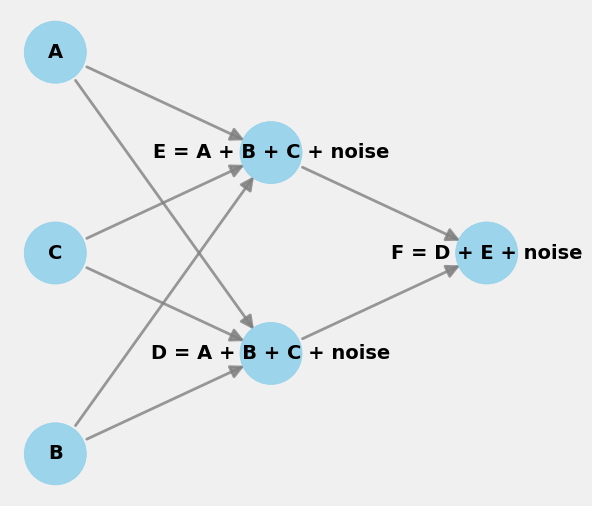

In [ ]:
gcm.util.plot(graph, figure_size=(6,6))

In [ ]:
# Create node lookup for channels
node_lookup = {0: 'Demand',
               1: 'TV spend',
               2: 'Social spend',
               3: 'Organic clicks',
               4: 'Social clicks',
               5: 'Revenue'
 }

total_nodes = len(node_lookup)

# Create adjacency matrix - this is the base for our graph
graph_actual = np.zeros((total_nodes, total_nodes))

# Create graph using expert domain knowledge
graph_actual[0, 3] = 1.0 # Demand -> Organic clicks
graph_actual[0, 4] = 1.0 # Demand -> Social clicks
graph_actual[1, 3] = 1.0 # Brand spend -> Organic clicks
graph_actual[2, 3] = 1.0 # Social spend -> Organic clicks
graph_actual[1, 4] = 1.0 # Brand spend -> Social clicks
graph_actual[2, 4] = 1.0 # Social spend -> Social clicks
graph_actual[3, 5] = 1.0 # Organic clicks -> Revenue
graph_actual[4, 5] = 1.0 # Social clicks -> Revenue

graph_actual

array([[0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
def plot_graph(input_graph, node_lookup):
    '''
    Function to visualise graphs.

    Args:
        input_graph (array): Adjacency matrix representing graph
        node_lookup (dict): Dictionary containing node names.
    '''

    graph = nx.DiGraph(input_graph)

    plt.figure(figsize=(8,8))
    nx.draw(
    G=graph,
    #node_color=COLORS[0],
    node_size=8000,
    arrowsize=17,
    with_labels=True,
    labels=node_lookup,
    font_color='white',
    font_size=9,
    pos=nx.circular_layout(graph)
    )

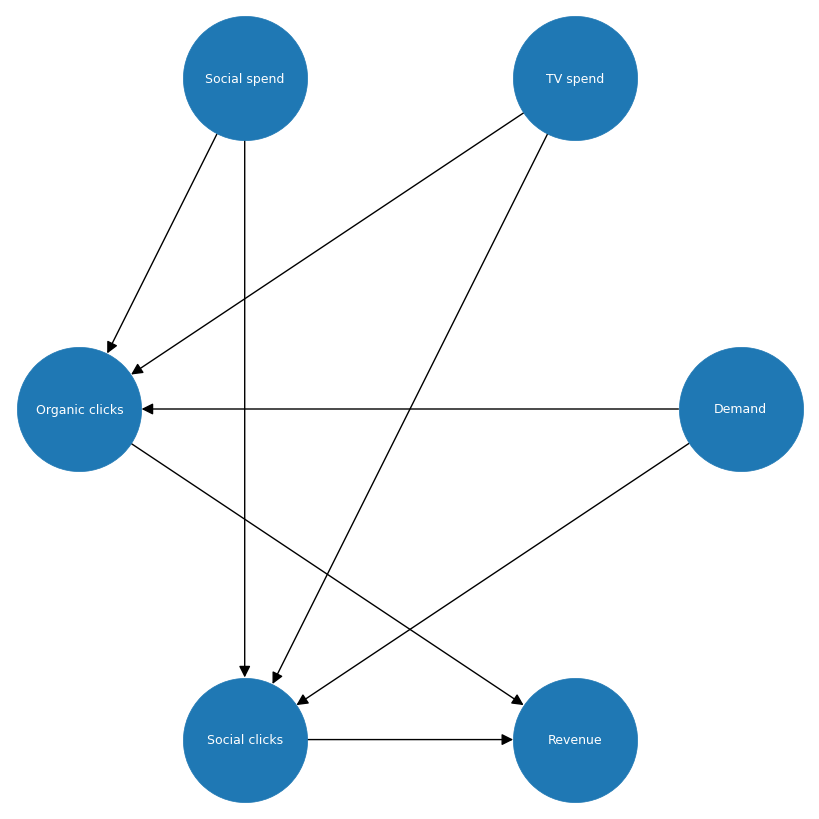

In [ ]:
plot_graph(input_graph=graph_actual, node_lookup=node_lookup)

In [ ]:
# Create dataframe with 1 column per code
df = pd.DataFrame(columns=node_lookup.values())

# Setup data generating process
df[node_lookup[0]] = np.random.normal(100000, 25000, size=(20000)) # Demand
df[node_lookup[1]] = np.random.normal(100000, 20000, size=(20000)) # Brand spend
df[node_lookup[2]] = np.random.normal(100000, 25000, size=(20000)) # Social spend
df[node_lookup[3]] = 0.75 * df[node_lookup[0]] + 0.50 * df[node_lookup[1]] + 0.25 * df[node_lookup[2]] + np.random.normal(loc=0, scale=2000, size=20000) # Organic clicks
df[node_lookup[4]] = 0.30 * df[node_lookup[0]] + 0.50 * df[node_lookup[1]] + 0.70 * df[node_lookup[2]] + np.random.normal(100000, 25000, size=(20000)) # Social clicks
df[node_lookup[5]] = df[node_lookup[3]] + df[node_lookup[4]] + np.random.normal(loc=0, scale=2000, size=20000) # Revenue

df

,Demand,TV spend,Social spend,Organic clicks,Social clicks,Revenue
0,86014.781694,117568.774776,85977.461295,143153.932118,207184.053217,349642.549973
1,99121.239278,114320.843490,86946.220988,154262.838627,205750.523331,359394.475963
2,92107.672740,149184.002331,110685.097061,171561.616701,295118.259121,466896.146398
3,52575.028835,117587.962722,108030.222062,124875.095724,300386.653632,425172.608371
4,121517.572660,111949.425633,87692.144822,170160.332394,231496.906571,398974.162577
...,...,...,...,...,...,...
19995,103785.581428,124759.123860,84928.178431,159564.632121,275020.732770,433296.419355
19996,95923.948080,89524.549103,100708.766803,143246.488436,250466.455111,395518.400510
19997,77849.009123,96433.700981,98928.968781,131114.627705,256724.135962,387455.176378
19998,89115.920004,107534.425304,81374.660660,141509.276685,237838.507146,384054.081823


In [ ]:
# Setup graph
graph = nx.from_numpy_array(graph_actual, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, node_lookup)

# Create SCM
causal_model = gcm.InvertibleStructuralCausalModel(graph)

causal_model.set_causal_mechanism('Demand', gcm.EmpiricalDistribution()) # Deamnd
causal_model.set_causal_mechanism('TV spend', gcm.EmpiricalDistribution()) # Brand spend
causal_model.set_causal_mechanism('Social spend', gcm.EmpiricalDistribution()) # Social spend

causal_model.set_causal_mechanism('Organic clicks', gcm.AdditiveNoiseModel(gcm.ml.create_ridge_regressor())) # Organic clicks
causal_model.set_causal_mechanism('Social clicks', gcm.AdditiveNoiseModel(gcm.ml.create_ridge_regressor())) # Social clicks
causal_model.set_causal_mechanism('Revenue', gcm.AdditiveNoiseModel(gcm.ml.create_ridge_regressor())) # Revenue

gcm.fit(causal_model, df)


Fitting causal mechanism of node Revenue: 100%|██████████| 6/6 [00:00<00:00, 71.70it/s]


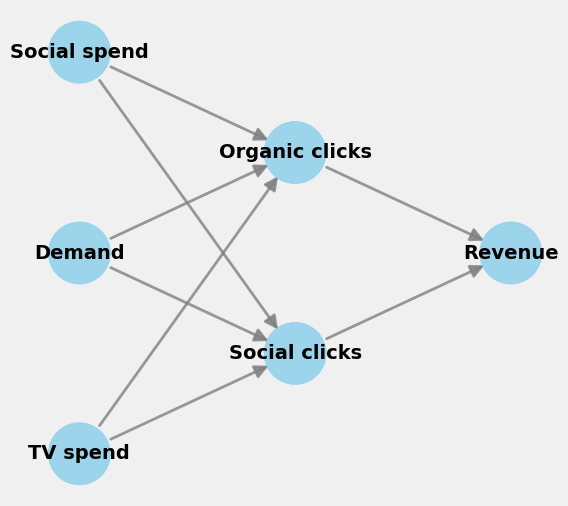

In [ ]:
gcm.util.plot(graph, figure_size=(6,6))

Test permutations of given graph: 100%|██████████| 50/50 [00:25<00:00,  1.99it/s]


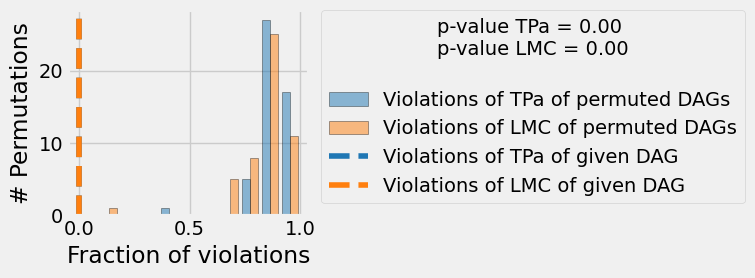

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [ ]:
# Check model fit statistics
print(gcm.evaluate_causal_model(causal_model, df))

In [ ]:
# calculate intrinsic causal influence
ici = gcm.intrinsic_causal_influence(causal_model=causal_model,
                                     target_node='Revenue',
                                     prediction_model=gcm.ml.create_linear_regressor()
)


Estimating Shapley Values. Average change of Shapley values in run 7 (35 evaluated permutations): 1.0391695635127616%: 100%|██████████| 1/1 [00:07<00:00,  7.35s/it]


In [ ]:
def convert_to_percentage(value_dictionary):
    total_absolute_sum = np.sum([abs(v) for v in value_dictionary.values()])
    return {k: round(abs(v) / total_absolute_sum, 2) for k, v in value_dictionary.items()}

ici_results = convert_to_percentage(ici)
ici_results

{'Demand': 0.31,
 'TV spend': 0.18,
 'Social spend': 0.24,
 'Organic clicks': 0.0,
 'Social clicks': 0.25,
 'Revenue': 0.0}

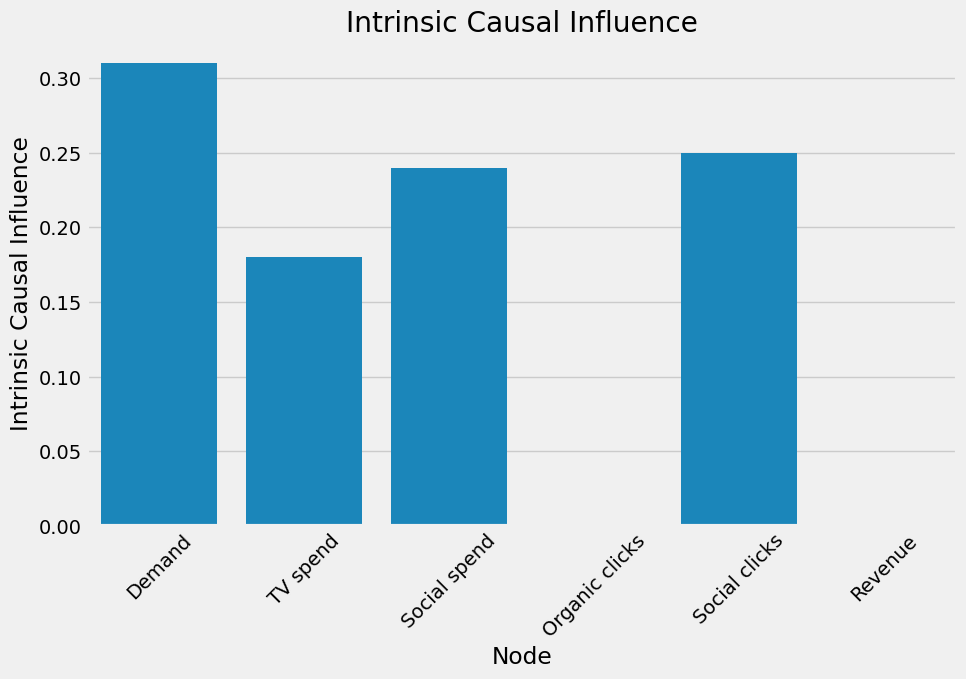

In [ ]:
# Convert dictionary to DataFrame
df = pd.DataFrame(list(ici_results.items()), columns=['Node', 'Intrinsic Causal Influence'])

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Node', y='Intrinsic Causal Influence', data=df)

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.title('Intrinsic Causal Influence')
plt.show()